In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#modification

In [3]:
#Code that extracts the data we use from a much larger dataset that comes from here https://git.nomics.world/dbnomics-source-data/cepii-source-data/-/blob/master/TRADE/trade_chel_YYYYMMDD.csv
"""
trade=pd.read_csv('trade_data.csv', usecols=['exporter', 'importer', 'secgroup', 'product', 'v2020', 'v2018','v2019'], sep=';')
trade_undifferenciated=trade[trade['product']=='TT']
trade_undifferenciated=trade_undifferenciated[['exporter','importer','secgroup','product','v2020', 'v2018','v2019']]
trade_undifferenciated.to_csv('Data_exports.csv')
"""

"\ntrade=pd.read_csv('trade_data.csv', usecols=['exporter', 'importer', 'secgroup', 'product', 'v2020', 'v2018','v2019'], sep=';')\ntrade_undifferenciated=trade[trade['product']=='TT']\ntrade_undifferenciated=trade_undifferenciated[['exporter','importer','secgroup','product','v2020', 'v2018','v2019']]\ntrade_undifferenciated.to_csv('Data_exports.csv')\n"

In [26]:
# data=pd.read_csv('Data_exports_3years.csv', index_col=0)
data=pd.read_csv('Data_exports_3years.csv', index_col=0, sep=";")
data

,exporter,importer,secgroup,product,v2020,v2018,v2019
Column1,,,,,,,
72,AES,AES,CAT,TT,227476.045916,281739.772971,259984.826826
456,AES,AFA,CAT,TT,1437.590947,1468.127508,1343.455107
840,AES,AFN,CAT,TT,5408.519442,6412.925102,6402.037064
1224,AES,AFR,CAT,TT,47568.935618,56280.987236,55060.219805
1608,AES,AFS,CAT,TT,16271.739595,18221.008905,17416.171171
...,...,...,...,...,...,...,...
7417416,YUG,VEN,CAT,TT,1.633391,2.329487,0.969835
7417800,YUG,VNM,CAT,TT,114.547872,115.641546,111.686894
7418184,YUG,WLD,CAT,TT,85068.226420,88358.844531,88344.314071


In [27]:
data

,exporter,importer,secgroup,product,v2020,v2018,v2019
Column1,,,,,,,
72,AES,AES,CAT,TT,227476.045916,281739.772971,259984.826826
456,AES,AFA,CAT,TT,1437.590947,1468.127508,1343.455107
840,AES,AFN,CAT,TT,5408.519442,6412.925102,6402.037064
1224,AES,AFR,CAT,TT,47568.935618,56280.987236,55060.219805
1608,AES,AFS,CAT,TT,16271.739595,18221.008905,17416.171171
...,...,...,...,...,...,...,...
7417416,YUG,VEN,CAT,TT,1.633391,2.329487,0.969835
7417800,YUG,VNM,CAT,TT,114.547872,115.641546,111.686894
7418184,YUG,WLD,CAT,TT,85068.226420,88358.844531,88344.314071


In [28]:
code_country= pd.read_csv('country_codes_3.csv', encoding='latin-1', sep=';')

In [29]:
code_country

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND
...,...,...,...,...,...
222,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
223,882,Samoa,Samoa,WS,WSM
224,887,Yemen,Yemen,YE,YEM
225,891,Serbia and Montenegro,Serbia and Montenegro,CS,SCG


In [30]:
code_country_reduced=code_country[['iso_3digit_alpha', 'country_name_abbreviation']]

In [31]:

dic = code_country_reduced.set_index('iso_3digit_alpha').T.to_dict('list')

C:\Users\Chaik\AppData\Local\Temp\ipykernel_26060\724740330.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dic = code_country_reduced.set_index('iso_3digit_alpha').T.to_dict('list')


In [32]:
list_false_country=['ASM', 'IOT', 'VGB', 'CYM', 'CXR','CCK', 'COK','CSK','FLK', 'PYF', 'ATF', 'GIB','KIR', 'GRL','GUM',
                    'MAC', 'MUS', 'MSR', 'ANT', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'NIU', 'NFK', 'MNP', 'PCN',
                   "BLM", 'SHN', 'KNA', 'AIA', 'LCA','SPM', 'VCT','SMR', 'STP', 'ZAF', 'TKL', 'TTO', 'TCA','SUN', 'WLF']
for i in list_false_country :
    dic.pop(i)

In [33]:
def complete_name (x):
    if x in dic.keys() :
        return dic[x][0]
    else :
        return ''
data['exporter_name']=data['exporter'].apply(complete_name)
data['importer_name']=data['importer'].apply(complete_name)

In [34]:
data

,exporter,importer,secgroup,product,v2020,v2018,v2019,exporter_name,importer_name
Column1,,,,,,,,,
72,AES,AES,CAT,TT,227476.045916,281739.772971,259984.826826,,
456,AES,AFA,CAT,TT,1437.590947,1468.127508,1343.455107,,
840,AES,AFN,CAT,TT,5408.519442,6412.925102,6402.037064,,
1224,AES,AFR,CAT,TT,47568.935618,56280.987236,55060.219805,,
1608,AES,AFS,CAT,TT,16271.739595,18221.008905,17416.171171,,
...,...,...,...,...,...,...,...,...,...
7417416,YUG,VEN,CAT,TT,1.633391,2.329487,0.969835,,Venezuela
7417800,YUG,VNM,CAT,TT,114.547872,115.641546,111.686894,,Viet Nam
7418184,YUG,WLD,CAT,TT,85068.226420,88358.844531,88344.314071,,


In [35]:
data_complete = data[(data["importer_name"] != "") & (data["exporter_name"] != "")]

In [36]:
len(data_complete['importer_name'].unique())

80

In [37]:
def add_relative_volume(df, year):
    df_temp = df.copy()
    rel_vols = []
    for exp in df_temp.exporter.unique():
        total_volume = df_temp[df_temp["exporter"] == exp]["v"+str(year)].sum()
        for vol in df_temp[df_temp["exporter"] == exp]["v"+str(year)]:
            rel_vol = vol/total_volume
            rel_vols.append(rel_vol)
    df_temp["relative_volume"+"_"+str(year)] = rel_vols
    return df_temp

In [38]:
data_complete=add_relative_volume(data_complete, 2018)
data_complete=add_relative_volume(data_complete, 2019)
data_complete=add_relative_volume(data_complete, 2020)

In [39]:
data_relevant=data_complete[data_complete['relative_volume_2020']>.05]

In [40]:
data_relevant.to_csv("data_relevant_mars_30", index = False)
data_complete.to_csv('data_complete_3_years.csv', index = False)

In [41]:
pd.read_csv("data_complete_3_years.csv", sep=",")

,exporter,importer,secgroup,product,v2020,v2018,v2019,exporter_name,importer_name,relative_volume_2018,relative_volume_2019,relative_volume_2020
0,ALB,ALB,CAT,TT,0.000000,0.000000,0.000000,Albania,Albania,0.000000,0.000000,0.000000
1,ALB,ARG,CAT,TT,0.331972,0.260846,0.600098,Albania,Argentina,0.000120,0.000271,0.000172
2,ALB,AUS,CAT,TT,2.099945,5.103496,3.573215,Albania,Australia,0.002354,0.001614,0.001087
3,ALB,AUT,CAT,TT,28.753344,29.996366,35.448914,Albania,Austria,0.013834,0.016010,0.014887
4,ALB,BEL,CAT,TT,2.912183,3.848980,5.427032,Albania,Belgium-Luxembourg,0.001775,0.002451,0.001508
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,VNM,UKR,CAT,TT,469.650495,420.582012,437.185631,Viet Nam,Ukraine,0.001668,0.001573,0.001550
6396,VNM,URY,CAT,TT,61.885624,58.309505,61.332123,Viet Nam,Uruguay,0.000231,0.000221,0.000204
6397,VNM,USA,CAT,TT,74124.562477,45411.468563,61879.449603,Viet Nam,USA,0.180129,0.222713,0.244655
6398,VNM,VEN,CAT,TT,22.617408,22.516020,20.980374,Viet Nam,Venezuela,0.000089,0.000076,0.000075


## Construction Graph

In [42]:
list_country=list(data_complete['importer_name'].unique())

In [43]:
Graph_2020=nx.Graph()
Graph_2020.add_nodes_from(list_country)
Graph_2020.add_edges_from(zip(data_relevant['exporter_name'],data_relevant['importer_name']))

<function matplotlib.pyplot.show(close=None, block=None)>

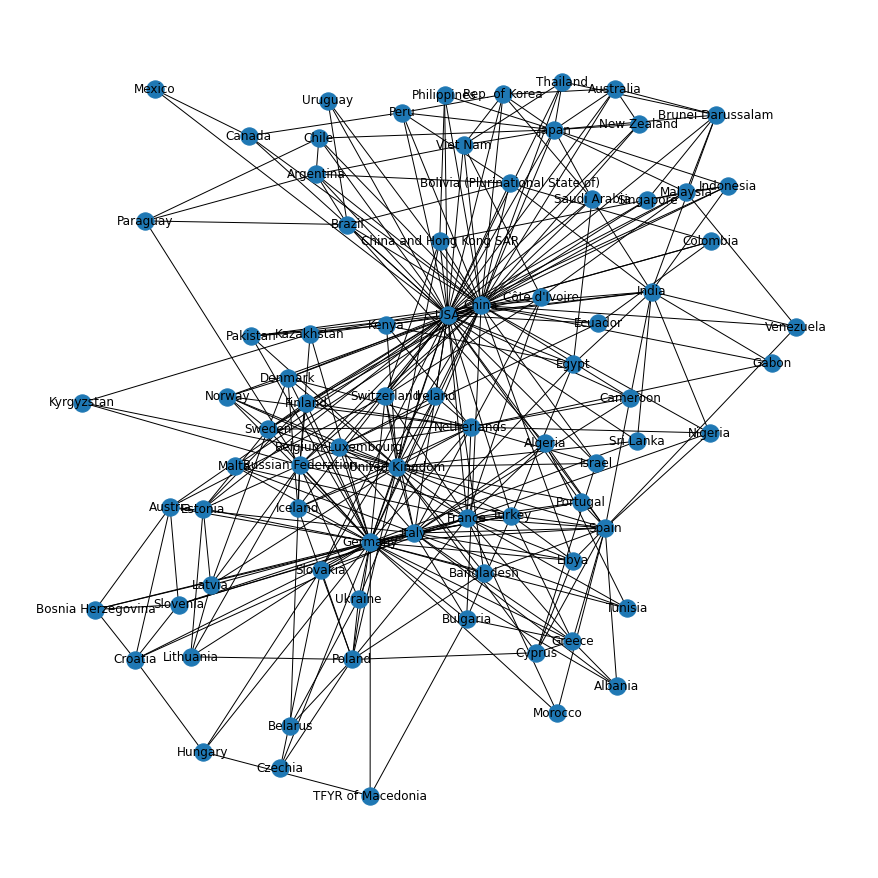

In [44]:
plt.figure(3, figsize=(12,12))
nx.draw(Graph_2020, with_labels=True, font_size=12)
plt.show